# Processamento de sinais

Na ciência e engenharias, o processamento de sinais é bastante útil, principalmente em áreas como _teoria do controle_. Um sinal pode ser:

- *temporal*: uma quantidade que varia no tempo (ex.: sinal de áudio, música etc.)
- *espacial*: uma quantidade que varia no espaço (ex.: uma imagem 2D) 

Sinais são frequentemente funções contínuas. Em aplicações computacionais, entretanto, eles se tornam discretos, visto que são amostrados em um conjunto limitado de pontos separados de distâncias uniformes.

Um algoritmo importantíssimo utilizado para processar sinais é a Transformada Rápida de Fourier, conhecida como *Fast Fourier Transform*, ou simplesmente *FFT*. 

## Análise espectral

A análise espectral, como o nome já diz, estuda espectros de frequencias e forma um arcabouço fundamental para aplicação da FFT e de transformadas de Fourier mais gerais. Transformadas são integrais matemáticas que nos permitem transformar um sinal do *domínio temporal* (onde ele é descrito como uma função do tempo) para o *domínio de frequencias* (onde ele é representado como uma função da frequencia). 

A representação de um sinal no domínio de frequencias é útil para muitos objetivos, entre os quais podemos citar a extração de frequencias dominantes, a aplicação de filtros e a resolução equações diferenciais.

## Transformadas de Fourier

A expressão matemática para a transformada de Fourier $F(v)$ de um sinal contínuo $f(t)$ é

$$F(v) = \int_{-\infty}^{+\infty} f(t) e^{-2 \pi i v t} \, dt.$$

A transformada de Fourier inversa é dada por:

$$f(t) = \int_{-\infty}^{+\infty} F(v) e^{2 \pi i v t} \, dv,$$

Acima, 

- $F(v)$ é o espectro de amplitudes do sinal $f(t)$ (uma função complexa)
- $v$ é a frequencia
- $F(t)$ é um sinal contínuo com duração infinita
- $t$ é uma coordenada temporal.

Usualmente, aplicações computacionais baseiam-se em amostrar a função $f(t)$ em $N$ pontos uniformemente espaçados $x_0, x_1, \ldots, x_N$ durante um intervalo finito de tempo $0 \leq t \leq T$, de modo que a transformada contínua anterior seja adaptada para a *Transformada de Fourier Discreta* (DFT), dada por:

$$X_k = \displaystyle\sum_{n=0}^{N-1}x_n e^{\frac{-2 \pi i n k}{N}},$$

cuja DFT inversa é

$$x_n = \frac{1}{N}\displaystyle\sum_{k=0}^{N-1}X_k e^{\frac{-2 \pi i n k}{N}}.$$

Acima, 

- $X_k$ é a DFT das amostras $x_n$;
- $k$ é uma faixa de frequencia (*bin*). 

O cálculo eficiente da DFT é feito pelo algoritmo conhecido como FFT.




## Módulo `fftpack`

Podemos usar o submódulo `fftpack` do `scipy` para ter acesso a implementações da FFT. Veremos uma aplicação das funções `fft` e `ifft`, que são, respectivamente, implementações da FFT geral e de sua inversa.

### Importação de módulos

In [5]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Aqui, criamos um sinal simulado com componentes senoidais puras em 1 Hz e em 22 Hz em cima de um ruído de distribuição normal. A função abaixo gera amostras ruidosas deste sinal:

In [31]:
def amostra_sinal(t):
    return (2 * np.sin(2 * np.pi * t) + 
            3 * np.sin(22 * 2 * np.pi * t) + 
            2 * np.random.randn(*np.shape(t)))

Uma vez que a DFT toma amostras discretas como entrada e retorna um espectro de frequencias discretas como saída, para usá-la em processos que são originalmente contínuos, primeiro devemos reduzir os sinais para valores discretos usando amostragem (*sampling*).

Pelo teorema da amostragem, um sinal contínuo com largura de banda $B$ (i.e. o sinal não contém frequencias maiores do que $B$) pode ser completamente reconstruído a partir de amostras discretas com frequencia de amostragem $f_s \geq 2B$. Este resultado nos diz sob quais circunstâncias podemos trabalhar com sinais discretos em vez de contínuos. Ele permite-nos determinar uma taxa de amostragem adequada.

Digamos que estejamos interessados em computar o espectro de frequencias deste sinal até frequencias de 30 Hz. Precisamos escolher a frequencia de amostragem $f_s = 60$ Hz e, se quisermos obter um espectro de frequencias com resolução de $\Delta f = 0.01$ Hz, precisamos coletar pelo menos $N = f_s / \Delta f = 6000$ amostras, correspondendo a um período de amostragem de $T = N/f_s = 100$ segundos.

In [9]:
B = 30.0 # largura de banda [Hz]
f_s = 2*B # frequencia de amostragem [Hz]
delta_f = 0.01 # espaçamento
N = int(f_s / delta_f) # número de amostras
T = N / f_s # tempo total de amostragem

Em seguida, amostramos o sinal em $N$ pontos.

In [10]:
t = np.linspace(0,T,N)
f_t = amostra_sinal(t)

O sinal é plotado como segue:

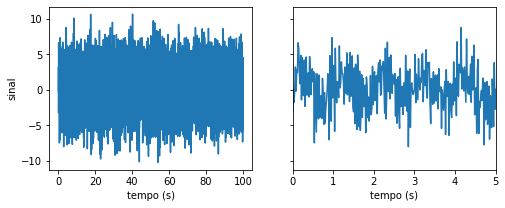

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
ax[0].plot(t, f_t)
ax[0].set_xlabel("tempo (s)")
ax[0].set_ylabel("sinal")
ax[1].plot(t, f_t)
ax[1].set_xlim(0, 5)
ax[1].set_xlabel("tempo (s)");

O sinal é muitor ruidoso. À direita, vemos uma plotagem ampliada. Para revelar as componentes senoidais no sinal, podemos usar a FFT para calcular o espectro do sinal, isto é, sua representação no domínio das frequencias.

In [20]:
F = fftpack.fft(f_t)

`F` contém as componentes de frequencia do espectro nas frequencias que são determinadas pela taxa de amostragem e pelo número de amostras. Ao computar estas frequencias, é conveniente usar:

In [21]:
f = fftpack.fftfreq(N,1.0/f_s)

para retornar as frequencias correspondendo a cada *bin* de frequnecia.

`f` possui frequencias positivas e negativas. Para selecionar as positivas, fazemos:

In [22]:
mask = np.where(f >= 0)

Em seguida, podemos plotar o espectro com as componentes positivas de frequencia (em escala logarítmica para contrastar sinal e ruído), bem como os dois picos em 1 Hz e 22 Hz que se sobressaem. Ambos correspondem às componentes senoidais existentes no sinal.

Embora o ruído esconda as componentes senoidais no sinal em seu domínio temporal, podemos vê-las claramente presentes no domínio das frequencias.

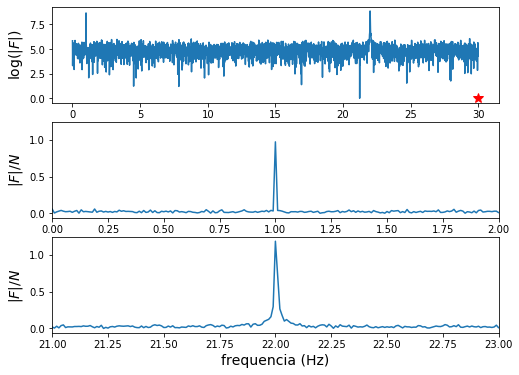

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
axes[0].plot(f[mask], np.log(abs(F[mask])), label="real")  
axes[0].plot(B, 0, 'r*', markersize=10)
axes[0].set_ylabel("$\log(|F|)$", fontsize=14)
axes[1].plot(f[mask], abs(F[mask])/N, label="real")
axes[1].set_xlim(0, 2)
axes[1].set_ylabel("$|F|/N$", fontsize=14)
axes[2].plot(f[mask], abs(F[mask])/N, label="real")
axes[2].set_xlim(21, 23)
axes[2].set_xlabel("frequencia (Hz)", fontsize=14)
axes[2].set_ylabel("$|F|/N$", fontsize=14);

### Filros no domínio das frequencias

Podemos também computar o sinal no domínio temporal a partir da representação no domínio das frequencias usando a função FFT inversa.

Por exemplo, a aplicação de um filtro passa-baixa (*low pass*) de 2 Hz, i.e. que suprime componentes com frequencia maiores do que 2 Hz nos leva a:

In [26]:
F_filtered = F * (abs(f) < 2)
f_t_filtered = fftpack.ifft(F_filtered)

O cálculo da FFT inversa para o sinal filtrado resulta em um sinal no domínio temporal onde as oscilações de alta frequencia estão ausentes. Este exemplo resume a essência de muitos filtros aplicáveis ao domínio de frequencias.

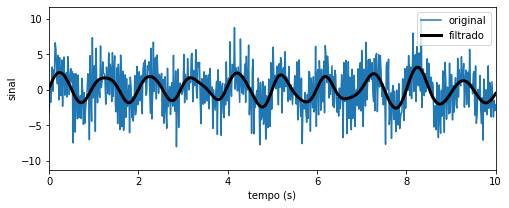

In [39]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(t, f_t, label='original')
ax.plot(t, f_t_filtered.real, color="black", lw=3, label='filtrado')
ax.set_xlim(0, 10)
ax.set_xlabel("tempo (s)")
ax.set_ylabel("sinal")
ax.legend();